In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ds_churn_data.csv')

In [62]:
pip install scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/1d/77/5e660d211906becd9f8e13e00d828f5e68b5e66d9b956f4646bb4882c68e/scipy-1.11.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.0/37.0 MB 23.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [31]:
numerical_data = df.describe().round(1)
numerical_data_transposed = numerical_data.transpose()
print(numerical_data_transposed)

                                  count    mean     std   min     25%     50%  \
customer_no                     20000.0  9999.5  5773.6   0.0  4999.8  9999.5   
transactions_past_month         20000.0     5.5     6.0   0.0     2.0     4.0   
transactions_past_3_month       20000.0    16.1    17.1   1.0     5.0    11.0   
spend_past_month                20000.0   186.1   202.9 -49.4    40.4   118.1   
spend_past_3_month              20000.0   527.5   551.2 -41.2   136.4   341.9   
latest_sains_trans_day_diff     20000.0    10.5    11.8   0.0     2.0     6.0   
first_sains_trans_day_diff      20000.0   340.9    52.4  11.0   349.0   360.0   
days_active                     20000.0   259.2   133.4   0.0   122.0   355.0   
age                             19926.0   103.7   322.8   2.0    38.0    54.0   
weeks_active_in_prev_12_months  20000.0     4.3    10.2   0.0     0.0     0.0   
delivery_pass_flag              19926.0     0.0     0.1   0.0     0.0     0.0   
smartshop_flag              

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_no                     20000 non-null  int64  
 1   transactions_past_month         20000 non-null  int64  
 2   transactions_past_3_month       20000 non-null  int64  
 3   spend_past_month                20000 non-null  float64
 4   spend_past_3_month              20000 non-null  float64
 5   latest_sains_trans_day_diff     20000 non-null  int64  
 6   first_sains_trans_day_diff      20000 non-null  int64  
 7   days_active                     20000 non-null  int64  
 8   gender                          19339 non-null  object 
 9   age                             19926 non-null  float64
 10  weeks_active_in_prev_12_months  20000 non-null  int64  
 11  delivery_pass_flag              19926 non-null  float64
 12  smartshop_flag                  

In [33]:
gender_distribution = df['gender'].value_counts(normalize=True) * 100
main_shop_type_distribution = df['main_shop_type'].value_counts(normalize=True) * 100
churn_distribution = df['churn_flag'].value_counts(normalize=True) * 100

print(gender_distribution)
print(main_shop_type_distribution)
print(main_shop_type_distribution)

gender
F    58.250168
M    32.354310
U     9.395522
Name: proportion, dtype: float64
main_shop_type
Superstore     68.431087
Mixed          20.164568
GOL             6.662987
Convenience     4.741358
Name: proportion, dtype: float64
main_shop_type
Superstore     68.431087
Mixed          20.164568
GOL             6.662987
Convenience     4.741358
Name: proportion, dtype: float64


In [34]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

sorted_ages = df.sort_values(by='age', ascending=False)
print(sorted_ages['age'])

#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')

17316    2022.0
17746    2022.0
12532    2022.0
8323     2022.0
3485     2022.0
16750    2022.0
12529    2022.0
12528    2022.0
14202    2022.0
6493     2022.0
10208    2022.0
3470     2022.0
14186    2022.0
10197    2022.0
13584    2022.0
2477     2022.0
10198    2022.0
12511    2022.0
13574    2022.0
10669    2022.0
12539    2022.0
2434     2022.0
3531     2022.0
5164     2022.0
18207    2022.0
13552    2022.0
5168     2022.0
15717    2022.0
10674    2022.0
17758    2022.0
5172     2022.0
16757    2022.0
3512     2022.0
15456    2022.0
438      2022.0
6534     2022.0
15453    2022.0
3447     2022.0
14181    2022.0
8430     2022.0
5318     2022.0
11801    2022.0
8405     2022.0
10632    2022.0
19832    2022.0
11822    2022.0
16218    2022.0
5311     2022.0
5324     2022.0
19843    2022.0
9054     2022.0
3382     2022.0
6348     2022.0
15733    2022.0
5326     2022.0
5342     2022.0
18525    2022.0
18538    2022.0
19045    2022.0
19041    2022.0
6400     2022.0
10212    2022.0
2488    

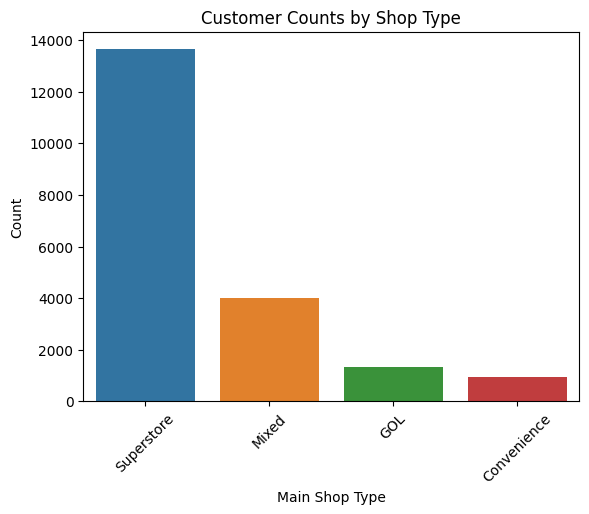

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='main_shop_type')
plt.xlabel('Main Shop Type')
plt.ylabel('Count')
plt.title('Customer Counts by Shop Type')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

In [36]:
# Check for missing values in the entire DataFrame
missing_values_count = df.isna().sum().sum()

print(f"Total number of missing values in the DataFrame: {missing_values_count}")


Total number of missing values in the DataFrame: 1228


In [37]:
import pandas as pd

# Set the display option to show all rows (None means unlimited)
pd.set_option('display.max_rows', None)

df_ages_sorted = df.sort_values(by='age', ascending=False)
top_ages = df_ages_sorted[['customer_no', 'age']]
print(top_ages)

pd.reset_option('display.max_rows')

       customer_no     age
17316        17316  2022.0
17746        17746  2022.0
12532        12532  2022.0
8323          8323  2022.0
3485          3485  2022.0
16750        16750  2022.0
12529        12529  2022.0
12528        12528  2022.0
14202        14202  2022.0
6493          6493  2022.0
10208        10208  2022.0
3470          3470  2022.0
14186        14186  2022.0
10197        10197  2022.0
13584        13584  2022.0
2477          2477  2022.0
10198        10198  2022.0
12511        12511  2022.0
13574        13574  2022.0
10669        10669  2022.0
12539        12539  2022.0
2434          2434  2022.0
3531          3531  2022.0
5164          5164  2022.0
18207        18207  2022.0
13552        13552  2022.0
5168          5168  2022.0
15717        15717  2022.0
10674        10674  2022.0
17758        17758  2022.0
5172          5172  2022.0
16757        16757  2022.0
3512          3512  2022.0
15456        15456  2022.0
438            438  2022.0
6534          6534  2022.0
1

In [38]:
# Data Cleaning to replace anomalous values with the median age

# Median age before cleaning
median_age = df['age'].median()

# Replacing anomalous age values with median age
df['age'] = df['age'].apply(lambda x: median_age if (x > 90) or (x < 19) else x)

pd.set_option('display.max_rows', None)

df_ages_sorted_cleaned = df.sort_values(by='age', ascending=False)
top_ages_cleaned = df_ages_sorted_cleaned[['customer_no', 'age']]
print(top_ages_cleaned)

pd.reset_option('display.max_rows')

# Calculate the mean/average age after cleaning
mean_age_cleaned = df['age'].mean()
print(f"Mean/Average Age After Cleaning: {mean_age_cleaned}")

# Calculate the median age after cleaning
median_age_cleaned = df['age'].median()
print(f"Median Age After Cleaning: {median_age_cleaned}")


       customer_no   age
15007        15007  90.0
17989        17989  90.0
18946        18946  90.0
5874          5874  90.0
11537        11537  90.0
14703        14703  90.0
18360        18360  90.0
16119        16119  90.0
11102        11102  90.0
1379          1379  90.0
15843        15843  90.0
1369          1369  90.0
7995          7995  90.0
18745        18745  90.0
14136        14136  90.0
19297        19297  90.0
14763        14763  90.0
12634        12634  90.0
16051        16051  90.0
13063        13063  90.0
350            350  90.0
2501          2501  90.0
126            126  90.0
2446          2446  90.0
14120        14120  90.0
1974          1974  90.0
14886        14886  90.0
948            948  90.0
14119        14119  90.0
19088        19088  90.0
987            987  90.0
18868        18868  90.0
16211        16211  90.0
6214          6214  90.0
17346        17346  90.0
4075          4075  90.0
12192        12192  90.0
16324        16324  90.0
18677        18677  89.0


In [39]:
# % of customers with Delivery Pass Subscription
# % of customers that use smartshop
 
# 1. Customers with a delivery_pass_flag and percentages
delivery_pass_counts = df['delivery_pass_flag'].value_counts()
delivery_pass_percentages = df['delivery_pass_flag'].value_counts(normalize=True) * 100
 
# 2. Customers who use smartshop and percentages
smartshop_counts = df['smartshop_flag'].value_counts()
smartshop_percentages = df['smartshop_flag'].value_counts(normalize=True) * 100
 
print(delivery_pass_counts, delivery_pass_percentages, smartshop_counts, smartshop_percentages)

delivery_pass_flag
0.0    19561
1.0      365
Name: count, dtype: int64 delivery_pass_flag
0.0    98.168222
1.0     1.831778
Name: proportion, dtype: float64 smartshop_flag
0.0    15396
1.0     4530
Name: count, dtype: int64 smartshop_flag
0.0    77.265884
1.0    22.734116
Name: proportion, dtype: float64


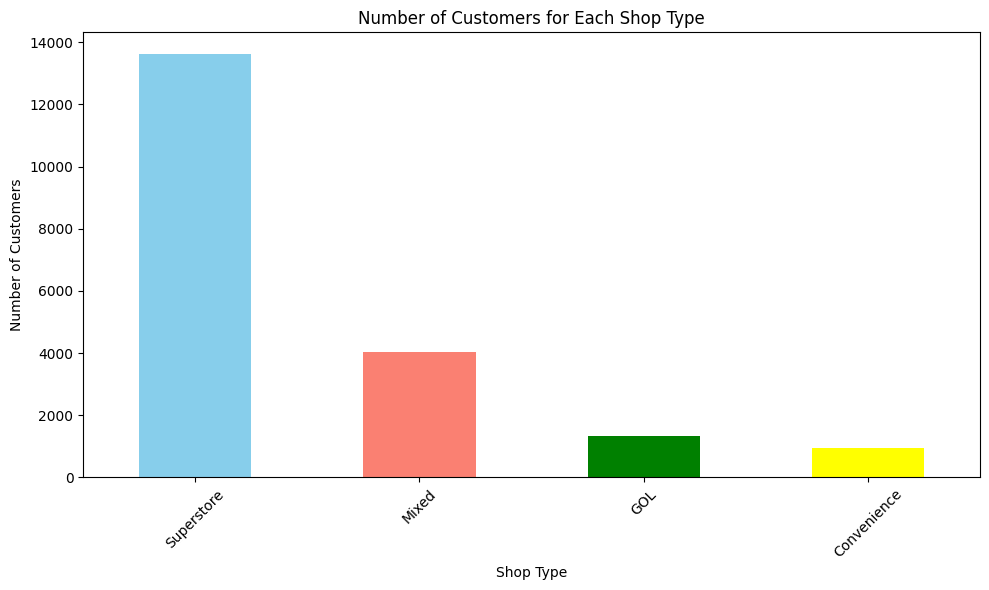

In [49]:
# Preferred store type

shop_type_counts = df['main_shop_type'].value_counts()
shop_type_percentages = df['main_shop_type'].value_counts(normalize=True) * 100
 
# Visualization
shop_type_plot = shop_type_counts.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon', 'green', 'yellow'])
shop_type_plot.set_title("Number of Customers for Each Shop Type")
shop_type_plot.set_xlabel("Shop Type")
shop_type_plot.set_ylabel("Number of Customers")
shop_type_plot.set_xticklabels(shop_type_counts.index, rotation=45)
 
plt.tight_layout()
plt.show()

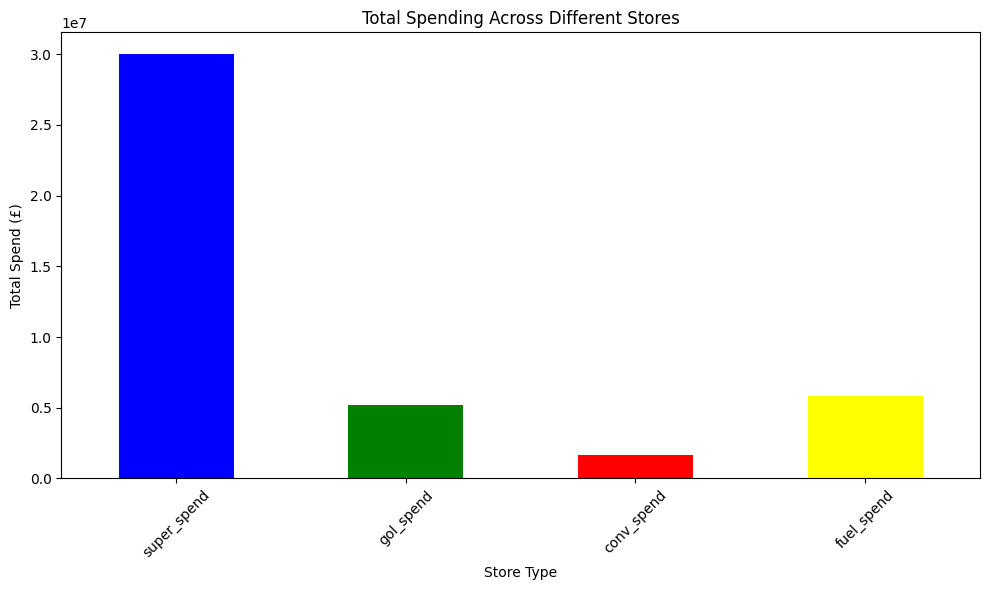

In [50]:
# Spending across different stores

spend_columns = ['super_spend', 'gol_spend', 'conv_spend', 'fuel_spend']
spend_data = df[spend_columns].sum()
 
# Visualization
spend_plot = spend_data.plot(kind='bar', figsize=(10, 6), color=['blue', 'green', 'red', 'yellow'])
spend_plot.set_title("Total Spending Across Different Stores")
spend_plot.set_xlabel("Store Type")
spend_plot.set_ylabel("Total Spend (£)")
spend_plot.set_xticklabels(spend_data.index, rotation=45)
 
plt.tight_layout()
plt.show()

In [51]:
# % Churn Flag

churned_count = df['churn_flag'].sum()
print(churned_count)
total_customers = len(df)
print(total_customers)
churn_rate = (churned_count / total_customers) * 100
print(churn_rate)

1034
20000
5.17


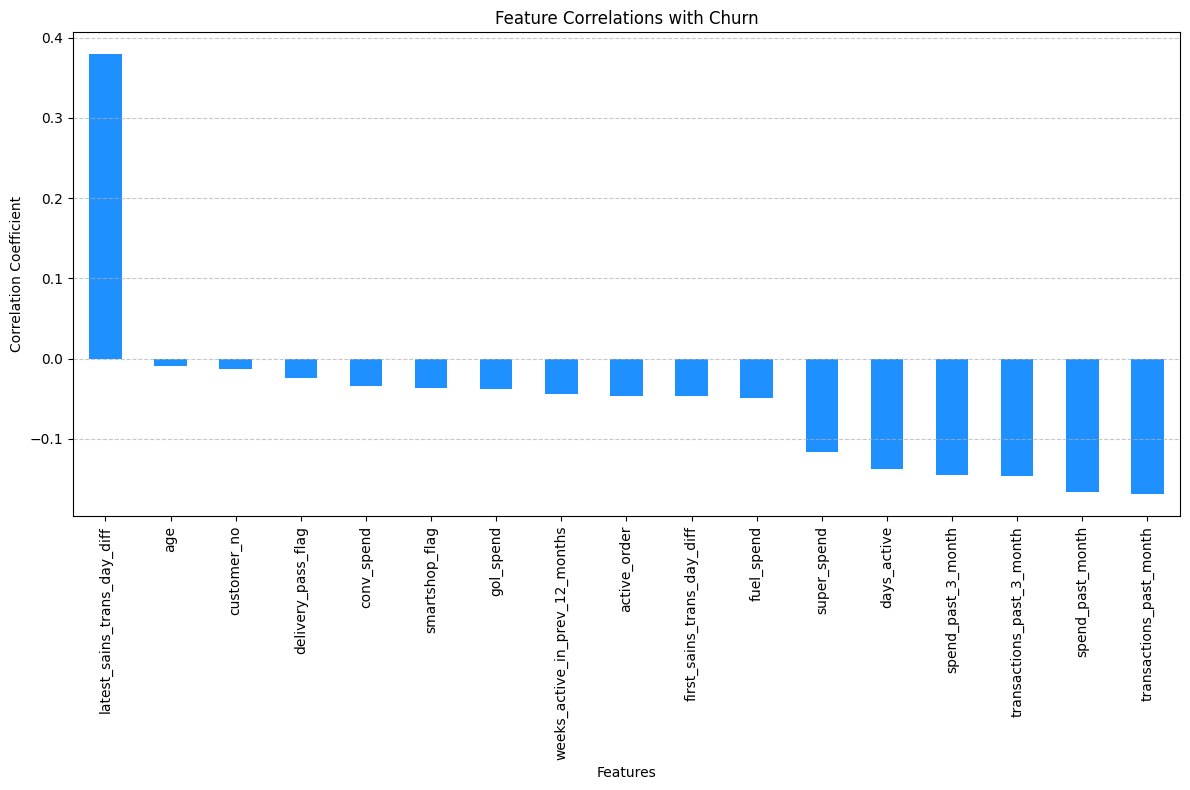

In [57]:
# correlation analysis

correlations = df.select_dtypes(include=['float64', 'int64']).corr()['churn_flag'].sort_values(ascending=False)
 
plt.figure(figsize=(12, 8))
correlations.drop('churn_flag').plot(kind='bar', color='dodgerblue')  # Drop churn_flag to avoid self-correlation
plt.title('Feature Correlations with Churn')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [45]:
#Churn_rate according to gender

# Calculate the churn rate for male (M) customers
male_df = df[df['gender'] == 'M']
male_churned_count = male_df['churn_flag'].sum()
total_male_customers = len(male_df)
male_churn_rate = (male_churned_count / total_male_customers) * 100

# Calculate the churn rate for female (F) customers
female_df = df[df['gender'] == 'F']
female_churned_count = female_df['churn_flag'].sum()
total_female_customers = len(female_df)
female_churn_rate = (female_churned_count / total_female_customers) * 100

# Display the churn rates for male and female customers
print(f'Male Churn Rate: {male_churn_rate:.2f}%')
print(f'Female Churn Rate: {female_churn_rate:.2f}%')

Male Churn Rate: 4.83%
Female Churn Rate: 5.23%


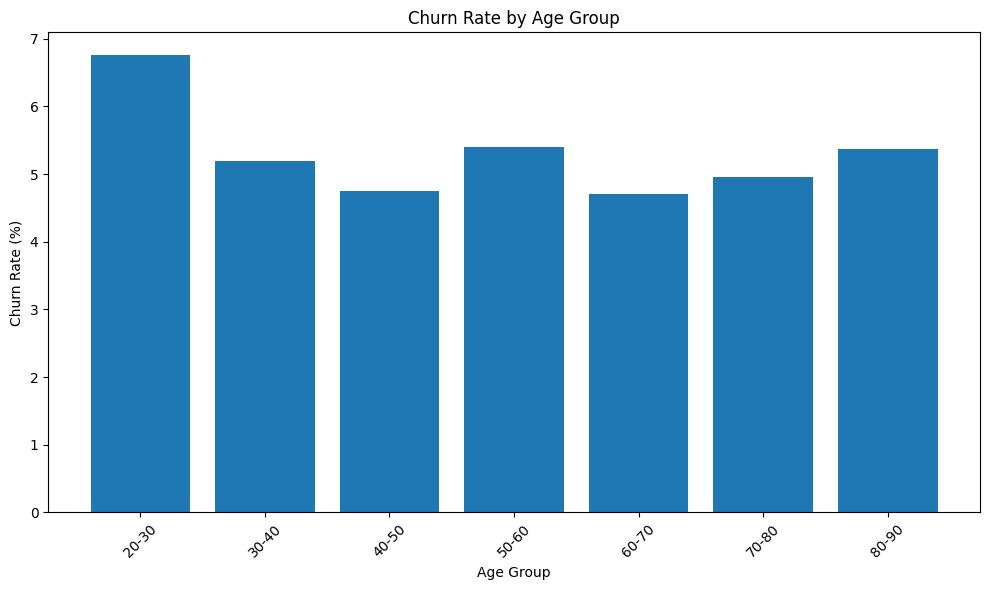

In [46]:
#Churn rate by age group

age_ranges = [20, 30, 40, 50, 60, 70, 80, 90]
age_labels = [f"{start}-{end}" for start, end in zip(age_ranges[:-1], age_ranges[1:])]

# Create bins for age ranges
df['age_group'] = pd.cut(df['age'], bins=age_ranges, labels=age_labels, right=False)

# Calculate churn rate for each age group
churn_rates = df.groupby('age_group')['churn_flag'].mean() * 100

# Plot the churn rates on a bar chart
plt.figure(figsize=(10, 6))
plt.bar(churn_rates.index, churn_rates.values)
plt.xlabel('Age Group')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [47]:
import pandas as pd

# Assuming you have a DataFrame df with your customer data

# Will need also convert gender and choice of store into numeric values in order to visualise a correlation

# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
gender_df = pd.get_dummies(df, columns=['gender'], prefix='gender', drop_first=True)

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
correlation_matrix_gender = gender_df.corr()

# Extract correlations with respect to "churn_flag" column
churn_correlations = correlation_matrix['churn_flag'].sort_values(ascending=False)
churn_correlations_gender = correlation_matrix_gender['churn_flag'].sort_values(ascending=False)

# Print or display the correlations
print("Correlations with Churn Flag:")
print(churn_correlations)
print(churn_correlations_gender)

ValueError: could not convert string to float: 'Superstore'

In [ ]:
non_numeric_columns = df.select_dtypes(exclude=['int64', 'float64']).columns
print("Non-Numeric Columns:", non_numeric_columns)


In [ ]:
correlation_data = {
    'Variable': ['latest_sains_trans_day_diff', 'age', 'customer_no', 'delivery_pass_flag', 'conv_spend',
                 'smartshop_flag', 'gol_spend', 'weeks_active_in_prev_12_months', 'active_order',
                 'first_sains_trans_day_diff', 'fuel_spend', 'super_spend', 'days_active',
                 'spend_past_3_month', 'transactions_past_3_month', 'spend_past_month',
                 'transactions_past_month'],
    'Correlation': [0.379160, 0.011010, -0.012634, -0.023440, -0.033642, -0.036864, -0.037160,
                    -0.044168, -0.046247, -0.046453, -0.049517, -0.116380, -0.137151, -0.144975,
                    -0.145984, -0.166425, -0.168855]
}

# Create a DataFrame from the correlation data
correlation_df = pd.DataFrame(correlation_data)

# Sort the DataFrame by absolute correlation values for better visualization
correlation_df['Absolute_Correlation'] = correlation_df['Correlation'].abs()
correlation_df = correlation_df.sort_values(by='Absolute_Correlation', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.barh(correlation_df['Variable'], correlation_df['Correlation'], color='skyblue')
plt.xlabel('Correlation')
plt.title('Correlation with Churn Flag')
plt.gca().invert_yaxis()  # Invert the y-axis to show the strongest correlations at the top
plt.show()

In [64]:
# ChiSquared and T-tests
from scipy.stats import ttest_ind, chi2_contingency

churned_customers = df[df['churn_flag'] == 1]
non_churned_customers = df[df['churn_flag'] == 0]

continuous_columns = ['age', 'spend_past_month', 'transactions_past_month', 'days_active']
categorical_columns = ['gender', 'main_shop_type', 'delivery_pass_flag', 'smartshop_flag']
 
# Perform t-tests for continuous variables
t_test_results = {}
 
for column in continuous_columns:
    t_stat, p_val = ttest_ind(churned_customers[column], non_churned_customers[column], equal_var=False)  # Welch's t-test
    t_test_results[column] = p_val
 
print(t_test_results)
 
 
from scipy.stats import chi2_contingency
 
# Perform Chi-squared tests for categorical variables
chi2_test_results = {}
 
for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df['churn_flag'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
    chi2_test_results[column] = p_val
 
print(chi2_test_results)


{'age': nan, 'spend_past_month': 0.0, 'transactions_past_month': 0.0, 'days_active': 1.0993913721725513e-72}
{'gender': 0.200182614104264, 'main_shop_type': 0.04539467707918845, 'delivery_pass_flag': 0.0014249719568893292, 'smartshop_flag': 2.3976378831379426e-07}
